<a href="https://colab.research.google.com/github/hpatel2004/scratchpad/blob/main/nb_2026_01_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/hpatel2004/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 33 (delta 6), reused 1 (delta 1), pack-reused 25 (from 1)
Receiving objects: 100% (33/33), 33.99 KiB | 17.00 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Download complete
Extracting data files...
Data extracted


OK, let's see if this saves back the way I expect.

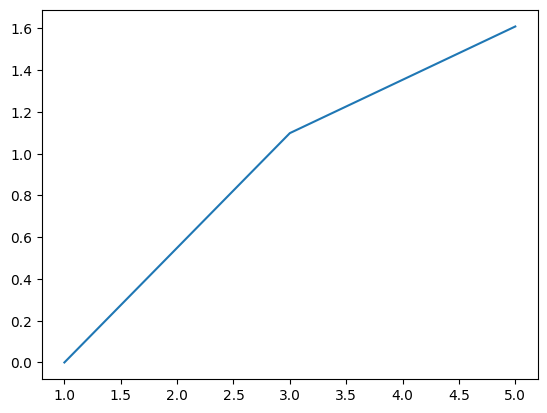

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,3,5])
y = np.log(x)

plt.plot(x,y)
plt.show()

In [4]:
import pandas as pd
# df = pd.read_csv('/content/data/heart_failure_clinical_records_dataset.csv')
df = pd.read_csv('/content/data/tech_stocks.csv')
df.head()

,Unnamed: 0,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,0,MSFT,2016-05-16,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
1,1,MSFT,2002-01-16,68.85,69.84,67.85,67.87,22.5902,30977700,1.0
2,2,MSFT,2001-09-18,53.41,55.00,53.17,54.32,18.0802,41591300,1.0
3,3,MSFT,2007-10-26,36.01,36.03,34.56,35.03,27.2232,288121200,1.0
4,4,MSFT,2014-06-27,41.61,42.29,41.51,42.25,38.6773,74640000,1.0


In [5]:
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df['symbol'].unique())
print(type(df['symbol'][0]))
print(type(df['date'][0]))

(32224, 10)
Index(['Unnamed: 0', 'symbol', 'date', 'open', 'high', 'low', 'close',
       'close_adjusted', 'volume', 'split_coefficient'],
      dtype='object')
Unnamed: 0             int64
symbol                object
date                  object
open                 float64
high                 float64
low                  float64
close                float64
close_adjusted       float64
volume                 int64
split_coefficient    float64
dtype: object
['MSFT' 'AAPL' 'GOOG' 'AMZN' 'FB' 'NFLX' 'NVDA']
<class 'str'>
<class 'str'>


In [6]:
from datetime import datetime
df['date'] = pd.to_datetime(df['date'])

Unnamed: 0                    int64
symbol                       object
date                 datetime64[ns]
open                        float64
high                        float64
low                         float64
close                       float64
close_adjusted              float64
volume                        int64
split_coefficient           float64
dtype: object


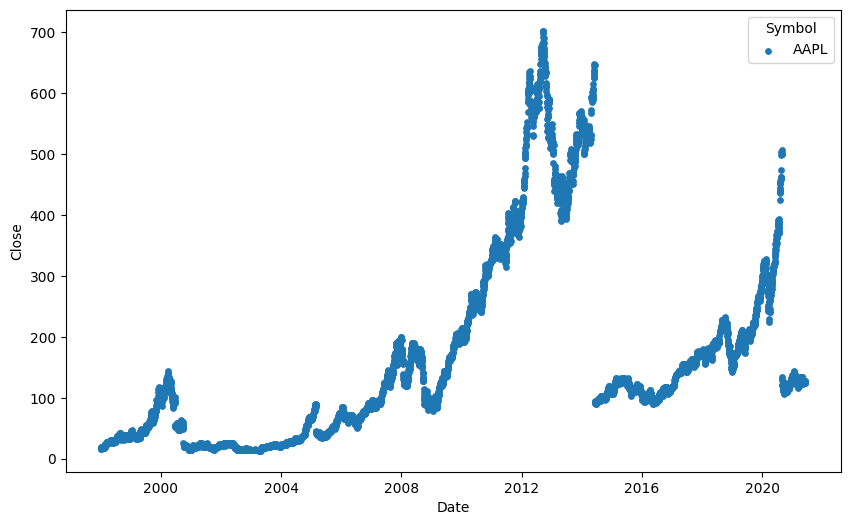

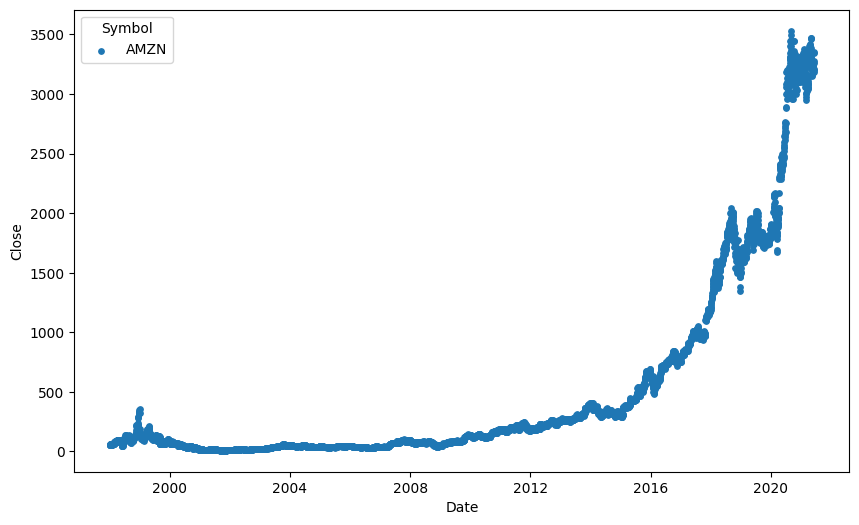

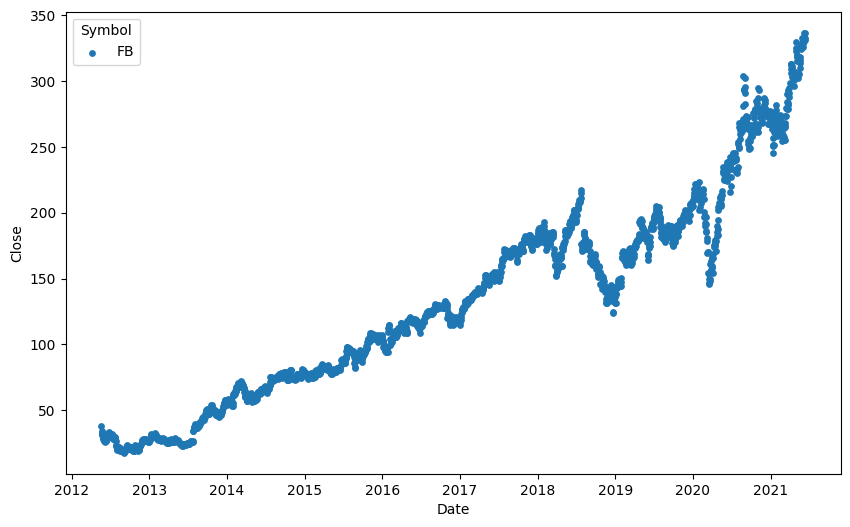

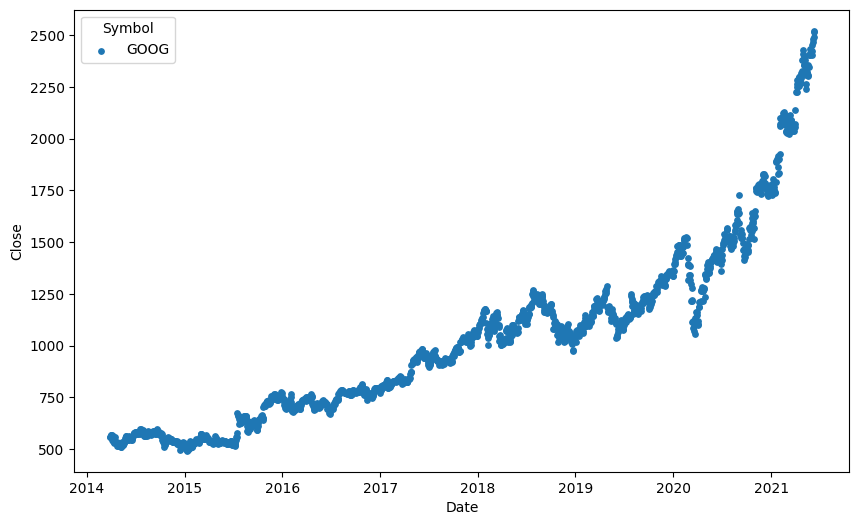

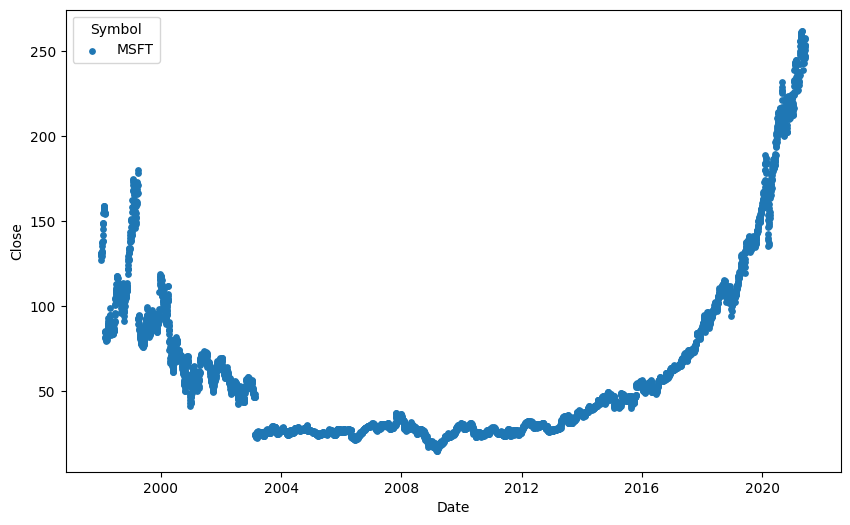

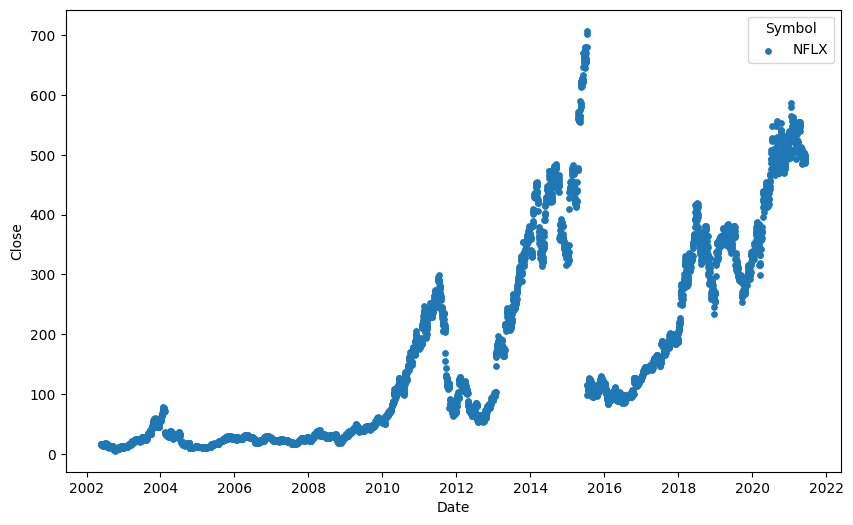

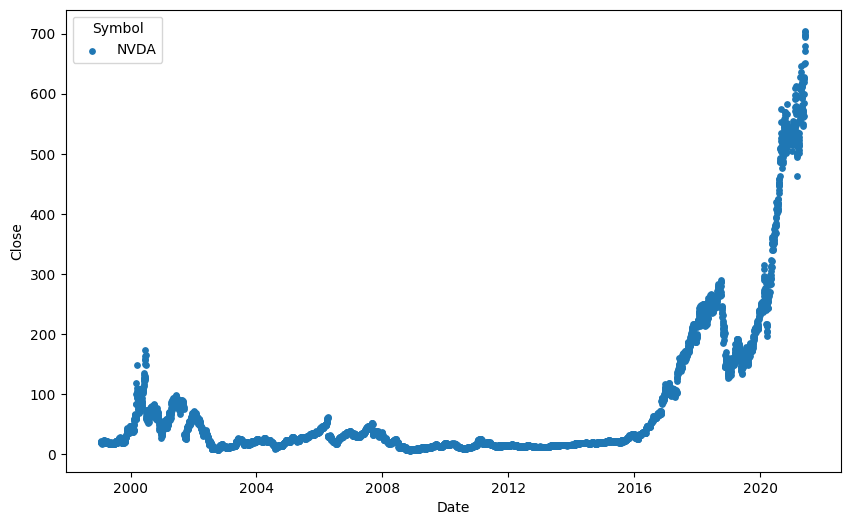

In [19]:
for symbol, g in df.groupby("symbol"):
    plt.figure(figsize=(10, 6))
    plt.scatter(g["date"], g["close"], label=symbol, s=15)

    plt.legend(title="Symbol")
    plt.xlabel("Date")
    plt.ylabel("Close")

    plt.show()

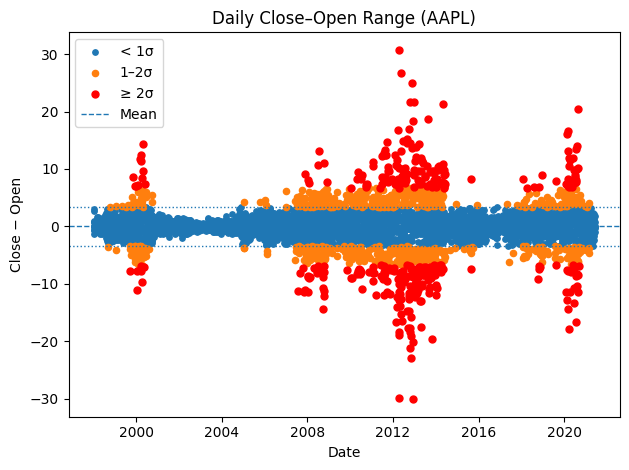

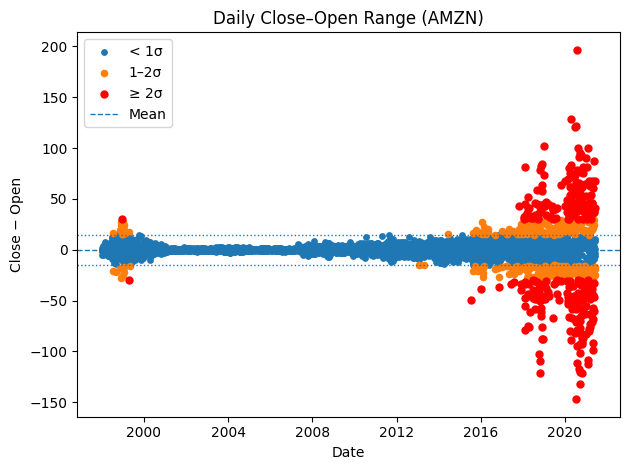

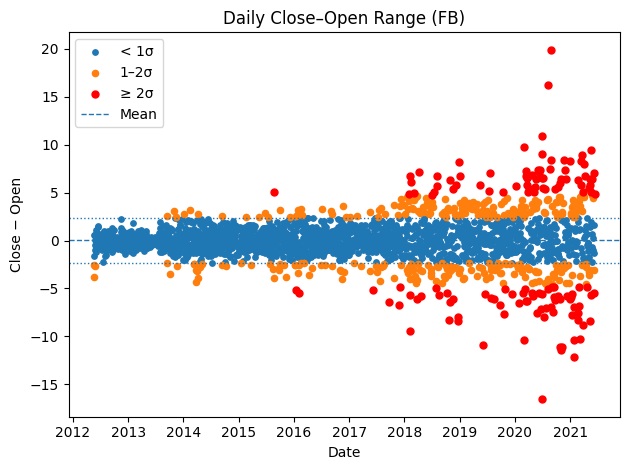

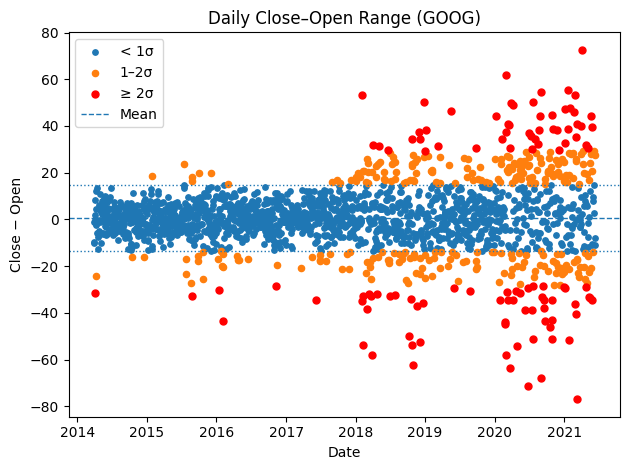

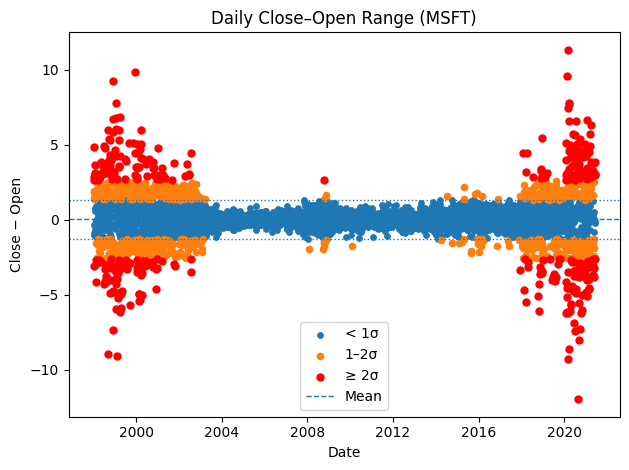

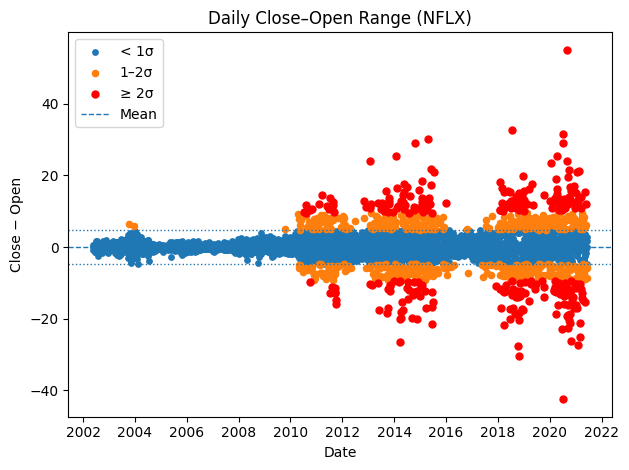

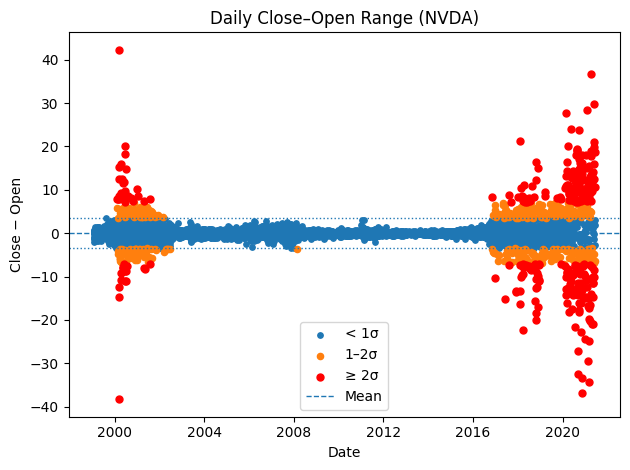

In [28]:
df["open_close_diff"] = df["close"] - df["open"]

for symbol, g in df.groupby("symbol"):
    mean = g["open_close_diff"].mean()
    std = g["open_close_diff"].std()

    # # masks
    # normal = np.abs(g["open_close_diff"] - mean) < std
    # outlier = ~normal

    # plt.figure(figsize=(11, 6))

    # # normal points
    # plt.scatter(
    #     g.loc[normal, "date"],
    #     g.loc[normal, "open_close_diff"],
    #     s=15,
    #     alpha=0.6,
    #     label="Within 1σ"
    # )

    # # outliers
    # plt.scatter(
    #     g.loc[outlier, "date"],
    #     g.loc[outlier, "open_close_diff"],
    #     s=20,
    #     color="red",
    #     label="≥ 1σ from mean"
    # )
    z = np.abs((g["open_close_diff"] - mean) / std)

    plt.scatter(g.loc[z < 1, "date"], g.loc[z < 1, "open_close_diff"], label="< 1σ", s=15)
    plt.scatter(g.loc[(z >= 1) & (z < 2), "date"], g.loc[(z >= 1) & (z < 2), "open_close_diff"], label="1–2σ", s=20)
    plt.scatter(g.loc[z >= 2, "date"], g.loc[z >= 2, "open_close_diff"], label="≥ 2σ", s=25, color="red")


    # reference lines
    plt.axhline(mean, linestyle="--", linewidth=1, label="Mean")
    plt.axhline(mean + std, linestyle=":", linewidth=1)
    plt.axhline(mean - std, linestyle=":", linewidth=1)

    plt.xlabel("Date")
    plt.ylabel("Close − Open")
    plt.title(f"Daily Close–Open Range ({symbol})")
    plt.legend()
    plt.tight_layout()
    plt.show()
